In [1]:
# Problem Statement:
# You are given a dataset containing information about the passengers of the Titanic.
# Your task is to perform exploratory data analysis (EDA) on the dataset using the following methods:

In [2]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 01
# Load the dataset(Titanic.csv) into a pandas dataframe and print the first 5 rows using the head() method.

In [4]:
df = pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# 02
# Use the info() method to get information about the dataset. In particular,
# pay attention to the data types of each column and whether there are any missing values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Missing values
# In Column "Age" - 177 missing values
# In Column "Cabin" - 687 missing values
# In Column "Embarked " - 2 missing values

In [9]:
# Removing the missing values entries present in 'Embarked' column from very column

df = df.dropna(subset=['Embarked'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


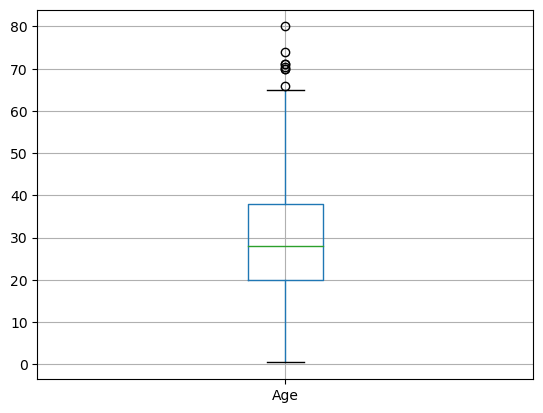

In [11]:
df.boxplot(column = "Age")
plt.show()

# outlier --> 'Age' > 63

In [12]:
count = 0
for val in df['Age']:
    if val < 63:
        count += 1

number = ((df['Age'].notna().sum()) - count)
print("Number of outliers: ", number)
percentage = ( number / 712) * 100
print(f"Percentage of outlier: {percentage:.3f}")

Number of outliers:  15
Percentage of outlier: 2.107


In [13]:
# Handling missing values --> 'Age'

df['Age'].fillna(df['Age'].median(), inplace = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [15]:
# 03
# Use the describe() method to describe the dataset.
# Pay attention to the range of values for each numeric column and whether there are any outliers.

In [16]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


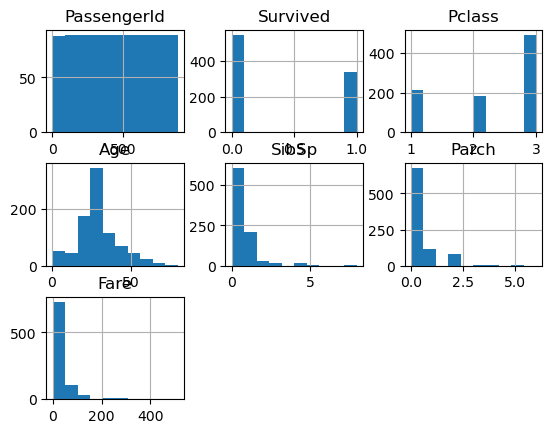

In [17]:
df.hist()
plt.show()

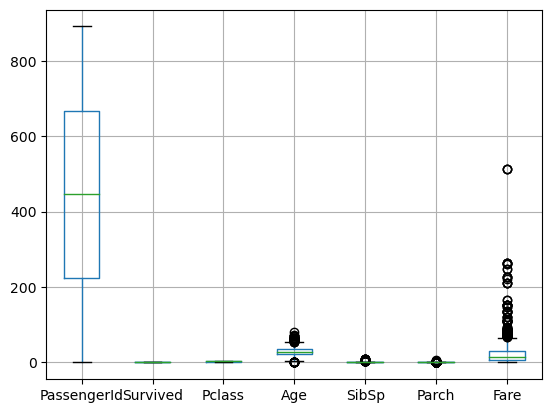

In [18]:
df.boxplot()
plt.show()

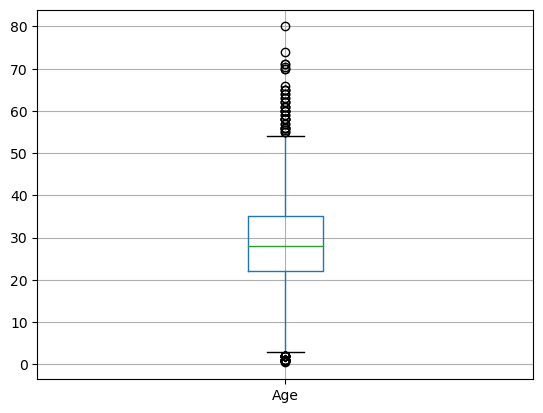

In [19]:
df.boxplot(column = "Age")
plt.show()

# outlier - Age > 63

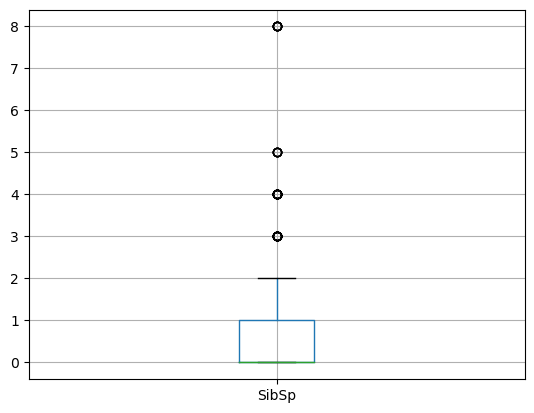

In [20]:
df.boxplot(column = "SibSp")
plt.show()

# outlier - SiSp > 2

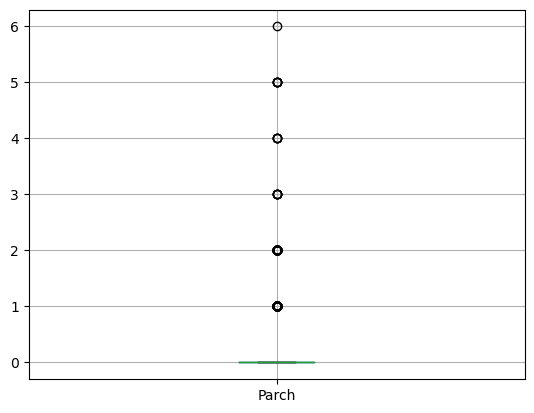

In [21]:
df.boxplot(column = "Parch")
plt.show()

# outlier - Parch > 0

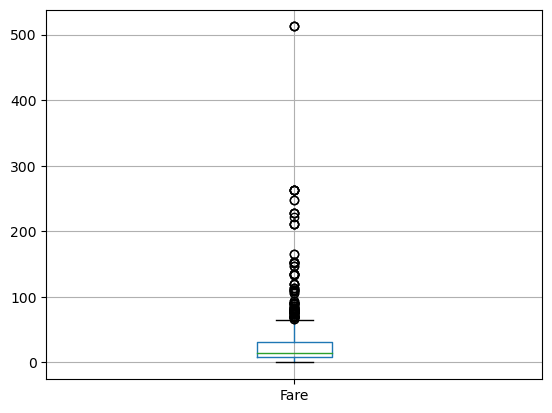

In [22]:
df.boxplot(column = "Fare")
plt.show()

# outlier - Fare > 75

In [23]:
# 04
# Use the groupby() method to group the data based on the Pclass column and calculate the mean fare for each class.

In [24]:
df["Pclass"].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [25]:
grouped_data = df.groupby("Pclass")
result = grouped_data["Fare"].mean()
print(result)

Pclass
1    84.193516
2    20.662183
3    13.675550
Name: Fare, dtype: float64


In [26]:
# 05
# Use the value_counts() method to get the frequency count of the Embarked column.

In [27]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
# 06
# Create a new column in the dataframe called AgeRange that categorises passengers into age ranges:
# "Child" for ages 0-12, "Teen" for ages 13-19, "Adult" for ages 20-59, and "Senior" for ages 60 and above.

In [29]:
def categorize_age(row):
    if 0 <= row['Age'] <= 12:
        return "Child"
    elif 13 <= row['Age'] <= 19:
        return "Teen"
    elif 20 <= row['Age'] <= 59:
        return "Adult"
    elif row['Age'] >= 60:
        return "Senior"
    else:
        return "Unknown"

df['AgeRange'] = df.apply(categorize_age, axis=1)

In [30]:
df["AgeRange"].value_counts()

# Unknown - 177 missing values

Adult     700
Teen       95
Child      69
Senior     25
Name: AgeRange, dtype: int64

In [31]:
# 07
# Use the pivot_table() method to create a pivot table that shows the survival rate of passengers
# based on their sex, class, and age range.

In [32]:
pivot_table = df.pivot_table(index=['Pclass', 'Sex'], columns=['AgeRange'], values='Survived', aggfunc='mean')
print(pivot_table)

AgeRange          Adult     Child    Senior      Teen
Pclass Sex                                           
1      female  0.973684  0.000000  1.000000  1.000000
       male    0.386139  1.000000  0.142857  0.250000
2      female  0.900000  1.000000       NaN  1.000000
       male    0.070588  1.000000  0.250000  0.100000
3      female  0.479592  0.478261  1.000000  0.590909
       male    0.125000  0.360000  0.000000  0.078947


In [33]:
# 08
# Create a bar chart that shows the total number of passengers in each age range.

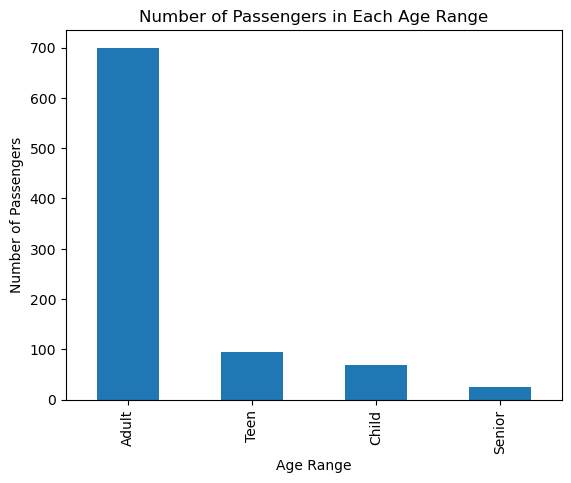

In [34]:
age_range_counts = df['AgeRange'].value_counts()
age_range_counts.plot(kind='bar')
plt.xlabel('Age Range')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers in Each Age Range')
plt.show()

In [35]:
df['AgeRange'].value_counts()

Adult     700
Teen       95
Child      69
Senior     25
Name: AgeRange, dtype: int64

In [36]:
# 09
# Create a scatter plot that shows the relationship between age and fare.
# Color the points based on whether the passenger survived or not.

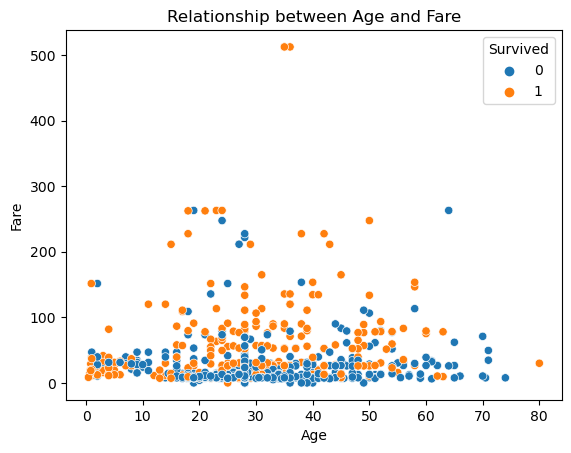

In [37]:
sns.scatterplot(data=df, x=df['Age'], y=df['Fare'], hue='Survived')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Relationship between Age and Fare')
plt.show()